[Ref code from build-nanogpt](https://github.com/karpathy/build-nanogpt/blob/master/play.ipynb)

### paper list 
- Attention is All You Need paper: https://arxiv.org/abs/1706.03762
- OpenAI GPT-3 paper: https://arxiv.org/abs/2005.14165 
- OpenAI GPT-2 paper: https://cdn.openai.com/better-language-models/language_models_are_unsupervised_multitask_learners.pdf

In [2]:
#ref code:https://github.com/karpathy/build-nanogpt/blob/master/play.ipynb
from transformers import GPT2LMHeadModel
import torch.nn as nn
from IPython.display import Image

In [3]:
model_hf = GPT2LMHeadModel.from_pretrained("gpt2") # 124M parameters
sd_hf = model_hf.state_dict()

for k,v in sd_hf.items():
    print(f"{k} {v.shape}")
# The output will show the shapes of the model's parameters, such as:

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [ ]:
sd_hf["transformer.wpe.weight"].view(-1)[:20]

tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565, -0.0025,  0.0135, -0.0042,  0.0151,  0.0166, -0.1381,
        -0.0063, -0.0461,  0.0267, -0.2042])

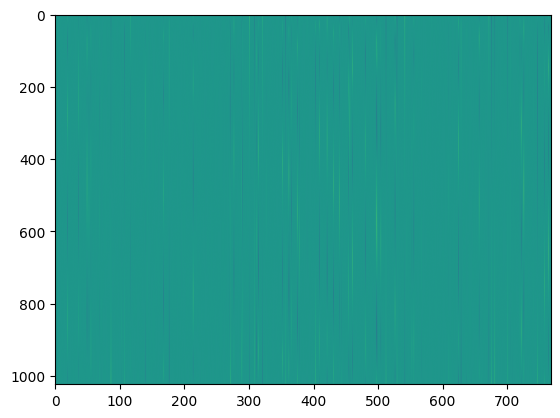

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(sd_hf["transformer.wpe.weight"],cmap='viridis', aspect='auto')

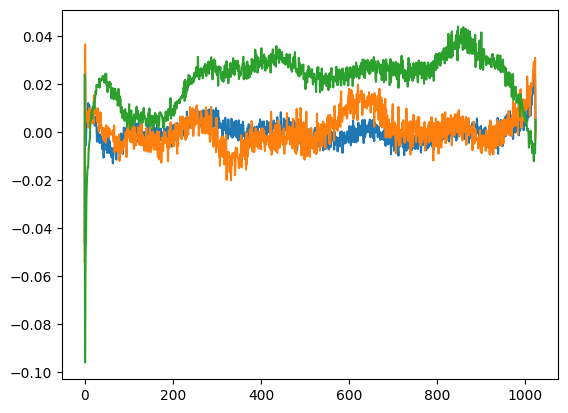

In [ ]:
plt.plot(sd_hf["transformer.wpe.weight"][:,150])
plt.plot(sd_hf["transformer.wpe.weight"][:,200])
plt.plot(sd_hf["transformer.wpe.weight"][:,250])

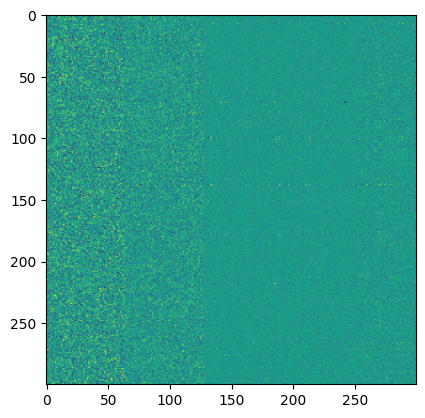

In [ ]:
plt.imshow(sd_hf["transformer.h.1.attn.c_attn.weight"][:300,:300], cmap='viridis')

In [ ]:
from transformers import pipeline,set_seed
generator = pipeline('text-generation', model='gpt2')
set_seed(42)
generator("Hello, I'm a language model,", max_length=30, num_return_sequences=5)

Device set to use mps:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/Users/zitianzhao/miniforge3/envs/transformer/lib/python3.12/site-packages/transformers/pytorch_utils.py:335: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_elements = torch.tensor(test_elements)
Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://h

[{'generated_text': "Hello, I'm a language model, and my project is based on the idea of a language model.\n\nI want to have a language that's both expressive and readable.\n\nLet's look at the following code:\n\nimport Data.ByteString\n\ndef get ( self ):\n\nself.data = Data.ByteString(data.get())\n\nself.data.append(data.get())\n\nself.data.append(data.get())\n\nself.data.append(data.get())\n\nself.data.append(data.get())\n\nself.data.append(data.get())\n\nself.data.append(data.get())\n\nself.data.append(data.get())\n\nself.data.append(data.get())\n\nself.data.append(data.get())\n\nself.data.append(data.get())\n\nself.data.append(data.get())\n\nself.data.append(data.get())\n\nself.data.append(data.get())\n\nself.data.append(data.get())\n\nself.data.append(data.get())\n\nself.data.append(data"},
 {'generated_text': "Hello, I'm a language model, not a language model, and if I don't understand it, I won't learn to write it. So I was writing a system for programming in JavaScript and a s

##### test code 
- B,T,C = x.size()
- qkv = self.c_attn(x)
- q,k,v = qkv.split(self.n_embd,dim=2)


In [ ]:
import torch
n_embd = 3
c_attn = nn.Linear(n_embd,3 * n_embd)
x = torch.tensor([[1.,3.,4.],[2.,4.,6.]],dtype=torch.float32)
x = x.view(-1,2,3)
y = c_attn(x)
print("c_attn.weight.shape: ",c_attn.weight.shape)
print("c_attn.shape: ",y.shape)
q,k,v = y.split(n_embd,dim=2)
print("q.shape,k.shape,v.shape: ",q.shape,k.shape,v.shape)

c_attn.weight.shape:  torch.Size([9, 3])
c_attn.shape:  torch.Size([1, 2, 9])
q.shape,k.shape,v.shape:  torch.Size([1, 2, 3]) torch.Size([1, 2, 3]) torch.Size([1, 2, 3])


In [ ]:
import torch
from torch.nn import functional as F

model = GPT2LMHeadModel.from_pretrained("gpt2")
model.eval()
# device detection code:
device = "cpu"
if torch.cuda.is_available():
    device = "cuda"
elif hasattr(torch.backends, "mps") and torch.backends.mps.is_available():
    device = "mps"
print(f"using device: {device}")

model.to(device)
torch.manual_seed(42)
torch.cuda.manual_seed(42)
tokens = [15496, 11, 314, 1101, 257, 3303, 2746, 11] # "Hello, I'm a language model,"  https://tiktokenizer.vercel.app/?model=gpt2
tokens = torch.tensor(tokens,dtype = torch.long)
tokens = tokens.unsqueeze(0).repeat(5,1)
x = tokens.to(device)

#print("model: ",model)

while x.size(1) < 30:
    with torch.no_grad():
        logits = model(x)[0] # (B,T,vocab_size)
        logits = logits[:,-1,:] # get the last token logits (B,vocab_size)
        probs = F.softmax(logits,dim=-1) # (B,vocab_size)
        topk_probs,topk_indices = torch.topk(probs,50,dim=-1) # (B,50) (B,50)
        ix = torch.multinomial(topk_probs,1) # (B,1)
        xcol = torch.gather(topk_indices,-1,ix) #(B,1)
        x = torch.cat((x,xcol),dim=1) # (B,T+1)

import tiktoken
enc = tiktoken.get_encoding("gpt2")
for i in range(5):
    tokens = x[i,:30].tolist()
    decoded = enc.decode(tokens)
    print(">",decoded)


using device: mps
> Hello, I'm a language model, which means I'm familiar with it, but I'm not fluent in that. Well, with that said,
> Hello, I'm a language model, and the syntax, to make use of it, is pretty good. So why do you have that and not
> Hello, I'm a language model, I'm doing this work in Python, and then I'm writing code for Haskell.

So we can
> Hello, I'm a language model, and you're making assumptions about my use of them. I'm not a natural language learner. I'm
> Hello, I'm a language model, well, I'm from Java and have to write a programming language for it. I have my own vocabulary because


In [ ]:
!curl -O https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


100 1089k  100 1089k    0     0   240k      0  0:00:04  0:00:04 --:--:--  240k


In [ ]:
with open('input.txt','r') as f:
    text = f.read()

data = text[:1000]
print(data[:100])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You


In [ ]:
import tiktoken
enc = tiktoken.get_encoding('gpt2')
tokens = enc.encode(data)
print(tokens[:24])

[5962, 22307, 25, 198, 8421, 356, 5120, 597, 2252, 11, 3285, 502, 2740, 13, 198, 198, 3237, 25, 198, 5248, 461, 11, 2740, 13]


In [ ]:
import torch
buf = torch.tensor(tokens[:24+1])
x = buf[:-1].view(4,6)
y = buf[1:].view(4,6)
print(x)
print(y)

tensor([[ 5962, 22307,    25,   198,  8421,   356],
        [ 5120,   597,  2252,    11,  3285,   502],
        [ 2740,    13,   198,   198,  3237,    25],
        [  198,  5248,   461,    11,  2740,    13]])
tensor([[22307,    25,   198,  8421,   356,  5120],
        [  597,  2252,    11,  3285,   502,  2740],
        [   13,   198,   198,  3237,    25,   198],
        [ 5248,   461,    11,  2740,    13,   198]])


In [ ]:
print(sd_hf["lm_head.weight"].shape)
print(sd_hf["transformer.wte.weight"].shape)

torch.Size([50257, 768])
torch.Size([50257, 768])


In [ ]:
(sd_hf["lm_head.weight"] == sd_hf["transformer.wte.weight"]).all()

tensor(True)

In [ ]:
print(sd_hf["lm_head.weight"].data_ptr())
print(sd_hf["transformer.wte.weight"].data_ptr())

13854453715
13854453715


## why torch.nn.init.normal_(module.weight,mean=0.0,std=0.02)
### 数值稳定性：
标准差0.02是一个经验值，它能够在网络初始化时提供适当的权重分布范围
太大的标准差会导致梯度爆炸，太小的标准差会导致梯度消失
0.02这个值在Transformer架构中被证明能够很好地平衡这两个问题
### Xavier/Glorot初始化的变体：
传统的Xavier初始化使用 std = sqrt(1/n_in)，其中n_in是输入特征数
在Transformer中，由于残差连接的存在，使用固定的较小标准差0.02效果更好
这个值最早来自于原始GPT论文，后来被广泛采用
### 与模型架构的关系：
GPT使用了LayerNorm，这使得网络对权重初始化不那么敏感
0.02的标准差配合LayerNorm，可以使得信号在前向传播时保持在合理范围内
残差连接也帮助减轻了初始化敏感性的问题
### 实践验证：
这个值在GPT、GPT-2等模型中都被证明是有效的
OpenAI的官方实现中也使用了这个值
许多后续的Transformer模型也采用了相同或相近的初始化方案
总的来说，0.02这个值是经过实践验证的经验值，它在保持数值稳定性的同时，能够让模型更容易收敛到好的解。这个初始化方案特别适合带有LayerNorm和残差连接的Transformer架构。

Xavier初始化（也叫Glorot初始化）设计的核心思想是：让每一层的输出方差和输入方差尽量一致，避免信号在前向传播和反向传播时逐层放大或缩小，保持梯度和激活的稳定。

### 其推导原理如下：

假设输入x的方差为Var[x]，权重w的方差为Var[w]，输出y=w·x。
若x和w独立，且均值为0，则输出的方差为：   Var[y] = n_in × Var[w] × Var[x]   （n_in为输入特征数）
为了让Var[y]和Var[x]相等（即信号方差不变），令Var[w] = 1/n_in。
所以初始化时，w的标准差std = sqrt(1/n_in)。
这样做的好处：

保证每层输出的方差不会因为层数增加而爆炸或消失
反向传播时梯度也能保持稳定，避免梯度消失/爆炸问题
Xavier初始化适用于激活函数为tanh或sigmoid的网络。对于ReLU激活，通常用He初始化（std = sqrt(2/n_in))。

### 推导如下：

假设 y = w₁x₁ + w₂x₂ + ... + wₙxₙ，n_in = n，x和w独立，且均值为0。

y = ∑(wᵢxᵢ)，i=1...n
Var[y] = Var[∑(wᵢxᵢ)]
  如果各项独立，则 Var[∑aᵢ] = ∑Var[aᵢ]
Var[wᵢxᵢ] = Var[wᵢ] × Var[xᵢ]（因为wᵢ和xᵢ独立，且均值为0）
假设每个wᵢ和xᵢ的方差都一样，Var[wᵢ]=Var[w]，Var[xᵢ]=Var[x]
所以 Var[y] = n × Var[w] × Var[x]
这就是 Var[y] = n_in × Var[w] × Var[x] 的推导过程。

Numerical Stability:  
A standard deviation of 0.02 is an empirical value that provides an appropriate range for weight distribution during network initialization.  
Too large a standard deviation can lead to gradient explosion, while too small a standard deviation can cause gradient vanishing.  
In Transformer architectures, 0.02 has been proven to strike a good balance between these two issues.  

Variation of Xavier/Glorot Initialization:  
The traditional Xavier initialization uses std = sqrt(1/n_in), where n_in is the number of input features.  
In Transformers, due to the presence of residual connections, a fixed smaller standard deviation of 0.02 works better.  
This value was first introduced in the original GPT paper and later widely adopted.  

Relationship with Model Architecture:  
GPT employs LayerNorm, which makes the network less sensitive to weight initialization.  
A standard deviation of 0.02, combined with LayerNorm, ensures that signals remain within a reasonable range during forward propagation.  
Residual connections also help mitigate initialization sensitivity.  

Practical Validation:  
This value has been proven effective in models like GPT and GPT-2.  
It is also used in OpenAI’s official implementations.  
Many subsequent Transformer models have adopted the same or similar initialization schemes.  

In summary, 0.02 is an empirically validated value that maintains numerical stability while enabling the model to converge more easily to good solutions. This initialization scheme is particularly well-suited for Transformer architectures with LayerNorm and residual connections.  

Xavier Initialization (also known as Glorot Initialization) is designed with the core idea of keeping the variance of each layer's output consistent with its input variance, preventing signals from being amplified or diminished layer by layer during forward and backward propagation, thereby maintaining stable gradients and activations.  

The derivation principle is as follows:  

Assume the input x has variance Var[x], the weight w has variance Var[w], and the output y = w·x.  
If x and w are independent with zero mean, the variance of the output is:  
  Var[y] = n_in × Var[w] × Var[x]  
  (n_in is the number of input features)  
To ensure Var[y] equals Var[x] (i.e., signal variance remains unchanged), set Var[w] = 1/n_in.  
Thus, during initialization, the standard deviation of w is std = sqrt(1/n_in).  

Advantages of this approach:  

- Ensures the output variance of each layer does not explode or vanish as depth increases.  
- Maintains stable gradients during backpropagation, avoiding gradient vanishing/explosion issues.  

Xavier initialization is suitable for networks with activation functions like tanh or sigmoid. For ReLU activations, He initialization (std = sqrt(2/n_in)) is typically used.  

Derivation:  

Assume y = w₁x₁ + w₂x₂ + ... + wₙxₙ, where n_in = n, and x and w are independent with zero mean.  

y = ∑(wᵢxᵢ), i=1...n  
Var[y] = Var[∑(wᵢxᵢ)]  
  If the terms are independent, then Var[∑aᵢ] = ∑Var[aᵢ]  
Var[wᵢxᵢ] = Var[wᵢ] × Var[xᵢ] (because wᵢ and xᵢ are independent with zero mean)  
Assume each wᵢ and xᵢ has the same variance: Var[wᵢ] = Var[w], Var[xᵢ] = Var[x]  
Thus, Var[y] = n × Var[w] × Var[x]  
This is the derivation of Var[y] = n_in × Var[w] × Var[x].

In [ ]:
x = torch.zeros(768)
n = 100

for i in range(n):
    x += n ** -0.5 * torch.randn(768)
print(x.std())

tensor(1.0324)


**gpt3 learning rate**

In [ ]:
Image('./imgs/WX20250629-155643@2x.png')

NameError: name 'Image' is not defined